# Análisis Empirico

### Cargar funciones necesarias

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

# Añade la carpeta raíz del proyecto (una carpeta arriba de /analysis) al path
sys.path.insert(0, os.path.abspath(".."))

from hanoi_dac import hanoi_dac_moves
from hanoi_dp import hanoi_dp_moves
from utils.timer import time_function
from hanoi_dac import hanoi_dac_moves_gen
from hanoi_dp import hanoi_dp_moves_gen

### Leer los casos de prueba

In [2]:
# Leer valores de discos desde el archivo de texto
with open("../inputs/test_cases.txt", "r") as file:
    test_cases = [int(line.strip()) for line in file.readlines()]


### Ejecutar pruebas empíricas

In [3]:
dac_times = []
dp_times = []

for n in test_cases:
    # DaC
    def run_dac(): 
        for _ in hanoi_dac_moves_gen(n, 'A', 'C', 'B'):
            pass
    dac_time = time_function(run_dac)
    dac_times.append(dac_time)

    # DP
    def run_dp(): 
        for _ in hanoi_dp_moves_gen(n, 'A', 'C', 'B'):
            pass
    dp_time = time_function(run_dp)
    dp_times.append(dp_time)

    print(f"n = {n} → DaC: {dac_time:.6f}s | DP: {dp_time:.6f}s")


n = 1 → DaC: 0.000004s | DP: 0.000002s
n = 2 → DaC: 0.000005s | DP: 0.000003s
n = 3 → DaC: 0.000003s | DP: 0.000003s
n = 4 → DaC: 0.000006s | DP: 0.000005s
n = 5 → DaC: 0.000011s | DP: 0.000011s
n = 6 → DaC: 0.000022s | DP: 0.000022s
n = 7 → DaC: 0.000050s | DP: 0.000046s
n = 8 → DaC: 0.000094s | DP: 0.000095s
n = 9 → DaC: 0.000193s | DP: 0.000194s
n = 10 → DaC: 0.000397s | DP: 0.000381s
n = 11 → DaC: 0.000772s | DP: 0.000824s
n = 12 → DaC: 0.001597s | DP: 0.001619s
n = 13 → DaC: 0.003365s | DP: 0.003243s
n = 14 → DaC: 0.006498s | DP: 0.007041s
n = 15 → DaC: 0.013645s | DP: 0.012934s
n = 16 → DaC: 0.025568s | DP: 0.024525s
n = 17 → DaC: 0.051054s | DP: 0.051791s
n = 18 → DaC: 0.107794s | DP: 0.110098s
n = 19 → DaC: 0.215141s | DP: 0.218926s
n = 20 → DaC: 0.459124s | DP: 0.445663s
n = 21 → DaC: 0.904115s | DP: 0.921058s
n = 22 → DaC: 1.878698s | DP: 1.894213s
n = 23 → DaC: 3.785421s | DP: 3.816765s
n = 24 → DaC: 7.727680s | DP: 7.933291s
n = 25 → DaC: 25.525180s | DP: 15.931232s
n = 26 

### Graficar resultados

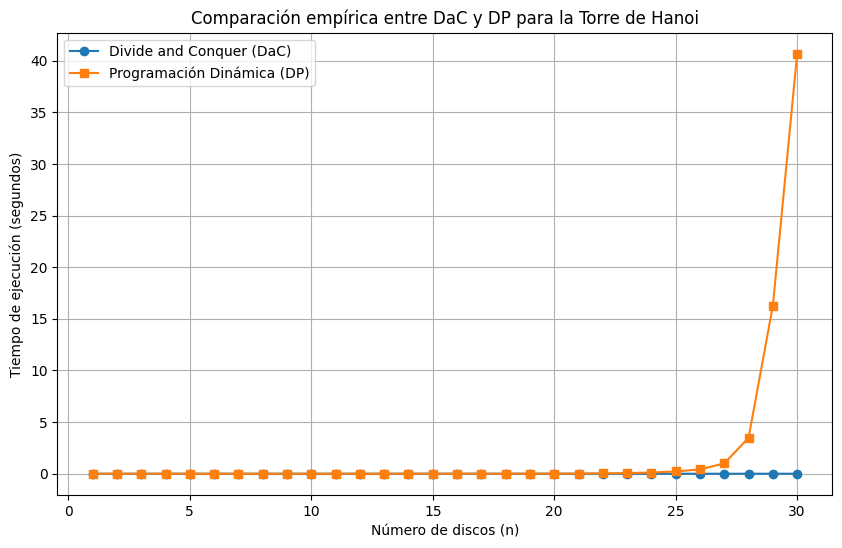

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(test_cases, dac_times, label='Divide and Conquer (DaC)', marker='o')
plt.plot(test_cases, dp_times, label='Programación Dinámica (DP)', marker='s')
plt.xlabel("Número de discos (n)")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Comparación empírica entre DaC y DP para la Torre de Hanoi")
plt.legend()
plt.grid(True)
plt.show()